<a href="https://colab.research.google.com/github/minsuk-heo/tf2/blob/master/jupyter_notebooks/07.CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN (Convolutional Neural Network)

In [1]:
from IPython.display import Image

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

tf.random.set_seed(1)

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing

In [4]:
# collect MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [52]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [54]:
#array([7, 2, 1, ..., 4, 5, 6]) => (10000,)
#array([[7],[2],[1],...,[4],[5],[6]]) => (10000,1)

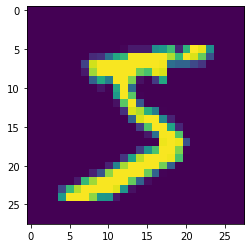

In [6]:
# sample to show gray scale values
plt.imshow(x_train[0])

In [7]:
# sample to show labels for first train data to 10th train data
print(y_train[0:9])

[5 0 4 1 9 2 1 3 1]


In [8]:
classes_name=[0,1,2,3,4,5,6,7,8,9]

In [9]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

test data has 10000 samples
every test data is 28 * 28 image


In [10]:
'''# reshape data
import numpy as np
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

print(x_train.shape)
print(x_test.shape)

# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale'''

"# reshape data\nimport numpy as np\nx_train = np.reshape(x_train, (60000,28,28,1))\nx_test = np.reshape(x_test, (10000,28,28,1))\n\nprint(x_train.shape)\nprint(x_test.shape)\n\n# normalization\nx_train = x_train.astype('float32')\nx_test = x_test.astype('float32')\n\ngray_scale = 255\nx_train /= gray_scale\nx_test /= gray_scale"

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
# change label to one hot encoding
'''num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)'''

'num_classes = 10\ny_train = tf.keras.utils.to_categorical(y_train, num_classes)\ny_test = tf.keras.utils.to_categorical(y_test, num_classes)'

### We will implement below CNN

In [14]:
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/practice_cnn.png", width=800, height=200)

In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=False),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)]

In [24]:
hist=model.fit(x_train, y_train,
          batch_size=500,
          epochs=10,
          verbose=1,
          validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 16s 305us/sample - loss: 0.6058 - accuracy: 0.8096 - val_loss: 0.1093 - val_accuracy: 0.9687
Epoch 2/10
54000/54000 [==============================] - 16s 300us/sample - loss: 0.1496 - accuracy: 0.9551 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 3/10
54000/54000 [==============================] - 19s 351us/sample - loss: 0.1089 - accuracy: 0.9658 - val_loss: 0.0530 - val_accuracy: 0.9863
Epoch 4/10
54000/54000 [==============================] - 20s 367us/sample - loss: 0.0863 - accuracy: 0.9736 - val_loss: 0.0437 - val_accuracy: 0.9888
Epoch 5/10
54000/54000 [==============================] - 19s 355us/sample - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0404 - val_accuracy: 0.9900
Epoch 6/10
54000/54000 [==============================] - 19s 358us/sample - loss: 0.0635 - accuracy: 0.9806 - val_loss: 0.0381 - val_accuracy: 0.9905
Epoch 7/10
54000/54000 [=====================

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02565300642650691
Test accuracy: 0.9916


In [26]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.02565300642650691, 0.9916]

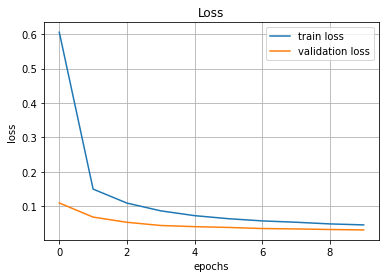

In [27]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

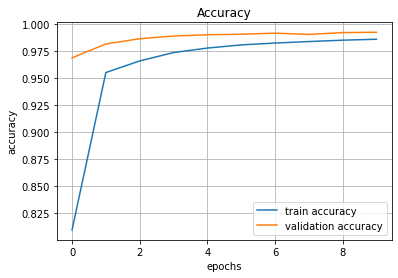

In [28]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [40]:
y_pred=model.predict_classes(x_test)

In [41]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [50]:
mat=confusion_matrix(y_test,y_pred)

(<Figure size 648x648 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

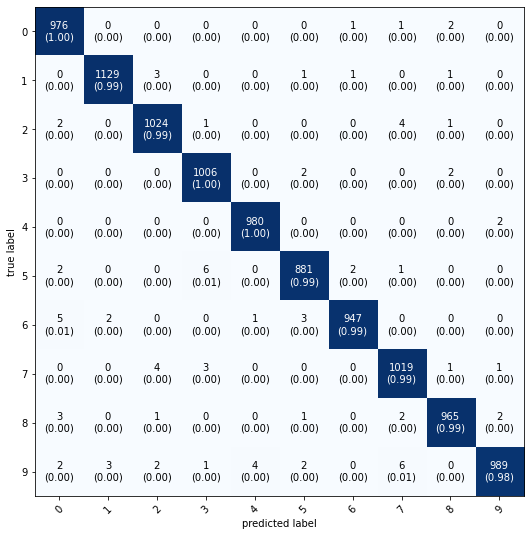

In [51]:
plot_confusion_matrix(mat,figsize=(9,9),class_names=classes_name,show_normed=True)